# Handling Imbalanced Data in the Abalone Dataset 
This notebook demonstrates how to handle imbalanced data using the Abalone dataset and compare the performance of machine learning model before and after dealing with imbalance data.
## Import Libraries and Dataset

In [92]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from collections import Counter

# fetch abalone dataset 
abalone = fetch_ucirepo(id=1)

# split into features and target 
X = abalone.data.features 
y = abalone.data.targets 

## Check Class Distribution Before Handling Imbalance 

In [76]:
print(f"Class distribution before handling imbalance: {Counter(y)}")

Class distribution before handling imbalance: Counter({'Rings': 1})


## Split Data and Standardise Features 

In [77]:
features = list(X.columns)
data= pd.get_dummies(X, columns=['Sex'], prefix='', prefix_sep='')
data = data.drop(['I'], axis=1)
data

Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell_weight      F      M  
0           0.1500  False   True  
1           0.0700  False   True  
2           0.2100   True  False  
3           0.1550  False   True  
4           0.0550  False  False  
...            ...    ...    ...  
4172        0.2490   True  False  
4173        0.2605  False   True  
4174        0.3080  False   True  
4175        0.2960   True  False  
4176        0.4950  False   True  

[4177 rows x 9 columns]

In [78]:
# Split data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

# standardise the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train and Evaluate Model Before Handling Imbalance
RandomForestClassifier will be train before applying any technique to handle imbalance and evaluate its performance.

In [79]:
# Train a model before handling class imbalance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# predict on test set and evaluate performance 
y_pred_before = rf_model.predict(X_test)
print("Classification Report Before Handling Imbalance:\n", classification_report(y_test, y_pred_before))
print("Confusion Matrix Before Handling Imbalance:\n",confusion_matrix(y_test, y_pred_before))

/home/cyrof/university/Ai-System-Design/ai_tut/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report Before Handling Imbalance:
               precision    recall  f1-score   support

           3       0.33      0.33      0.33         3
           4       0.35      0.54      0.42        13
           5       0.40      0.31      0.35        32
           6       0.23      0.19      0.20        48
           7       0.32      0.27      0.29        84
           8       0.30      0.41      0.35        99
           9       0.26      0.30      0.28       142
          10       0.22      0.24      0.23       139
          11       0.24      0.29      0.26        93
          12       0.07      0.06      0.06        51
          13       0.09      0.10      0.09        31
          14       0.12      0.04      0.06        26
          15       0.10      0.05      0.06        21
          16       0.10      0.08      0.09        13
          17       0.33      0.12      0.18         8
          18       0.00      0.00      0.00        12
          19       0.00      0.

/home/cyrof/university/Ai-System-Design/ai_tut/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cyrof/university/Ai-System-Design/ai_tut/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cyrof/university/Ai-System-Design/ai_tut/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

## Determine if Data is Under fit or Over fit

/home/cyrof/university/Ai-System-Design/ai_tut/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/cyrof/university/Ai-System-Design/ai_tut/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/cyrof/university/Ai-System-Design/ai_tut/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/cyrof/university/Ai-System-Design/ai_tut/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was e

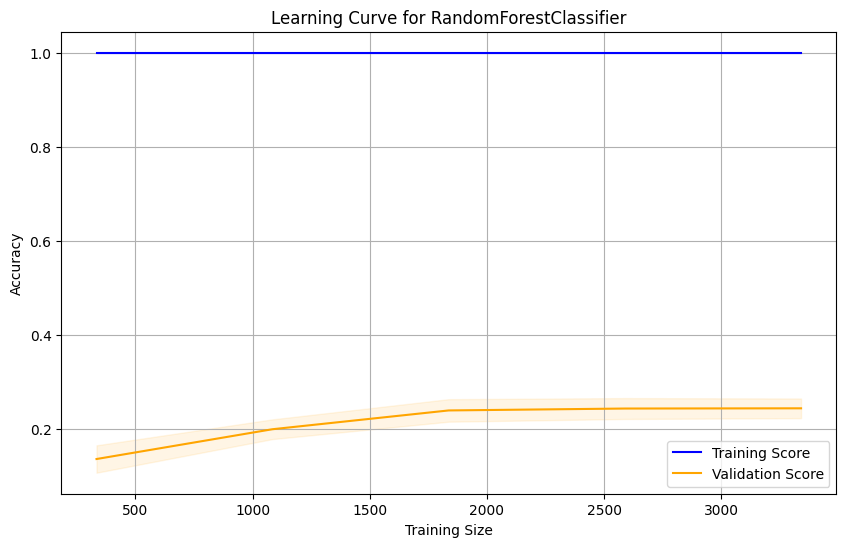

In [98]:
def check_dataset(x, y):
    # generate and plot learning curve
    train_sizes, train_scores, val_scores = learning_curve(rf_model, x, y, cv=5, n_jobs=-1)
    
    # calculate mean and std deviation for training and validation scores 
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    val_scores_std = np.std(val_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
    plt.plot(train_sizes, val_scores_mean, label='Validation Score', color='orange')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color='orange')
    plt.title('Learning Curve for RandomForestClassifier')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

check_dataset(data, y)

## Handle Imbalance Using Random Oversampling
Using Random Oversampling to balance the class distribution by duplicating samples from the minority class in the training set. 

Class distribution after Random Oversampling: Counter({'Rings': 1})


/home/cyrof/university/Ai-System-Design/ai_tut/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/cyrof/university/Ai-System-Design/ai_tut/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/cyrof/university/Ai-System-Design/ai_tut/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/cyrof/university/Ai-System-Design/ai_tut/lib/python3.12/site-packages/sklearn/base.py:1473:

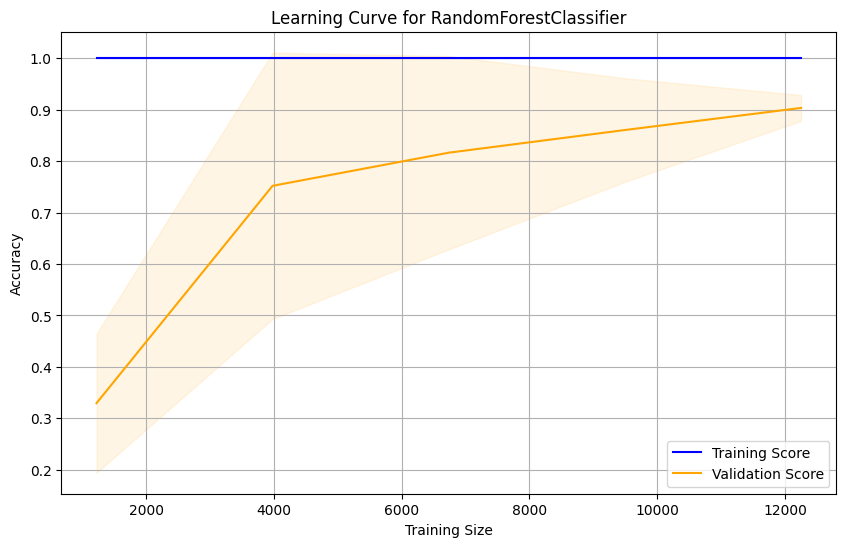

In [99]:
### use SMOTE to handle imbalance
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# check class distribution after handling imbalance
print(f"Class distribution after Random Oversampling: {Counter(y_train_resampled)}")
check_dataset(X_train_resampled, y_train_resampled)

## Train and Evaluate Model After Handling Imbalance
After applying Random Oversampling, the model will be trained again and evaluate its performance on the test set. 

In [101]:
# Train the model on resampled data
rf_model_resampled = RandomForestClassifier(random_state=42)
rf_model_resampled.fit(X_train_resampled, y_train_resampled)

# predict on test set and evaluate performance after resampling
y_pred_after = rf_model_resampled.predict(X_test)
print("Classification Report After Handling Imbalance:\n", classification_report(y_test, y_pred_after))
print("Confusion Matrix After Handling Imbalance:\n", confusion_matrix(y_test, y_pred_after))

/home/cyrof/university/Ai-System-Design/ai_tut/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report After Handling Imbalance:
               precision    recall  f1-score   support

           3       0.20      0.33      0.25         3
           4       0.31      0.31      0.31        13
           5       0.38      0.44      0.41        32
           6       0.24      0.25      0.25        48
           7       0.30      0.29      0.29        84
           8       0.31      0.40      0.35        99
           9       0.21      0.18      0.19       142
          10       0.22      0.18      0.20       139
          11       0.23      0.27      0.25        93
          12       0.12      0.12      0.12        51
          13       0.10      0.16      0.12        31
          14       0.04      0.04      0.04        26
          15       0.13      0.10      0.11        21
          16       0.14      0.15      0.15        13
          17       0.20      0.12      0.15         8
          18       0.00      0.00      0.00        12
          19       0.00      0.0

/home/cyrof/university/Ai-System-Design/ai_tut/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cyrof/university/Ai-System-Design/ai_tut/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cyrof/university/Ai-System-Design/ai_tut/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av